In [1]:
points = [326.6913799009275,151.09612141652613,216.607062868887,185.63237774030353,182.0708065451096,262.25969645868463,174.5160004742833,304.35075885328837,211.2107728182968,400.40472175379426,272.72847939502526,443.575042158516,310.5025097491568,416.5935919055649,374.1787323461214,361.5514333895447,404.39795662942663,311.9055649241146,417.34905275084316,264.41821247892074,408.7149886698988,221.24789207419897,374.1787323461214,179.15682967959526]

In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:

coordinates = np.array(points, dtype=np.int32).reshape(-1, 2)

In [4]:
print(coordinates)

[[326 151]
 [216 185]
 [182 262]
 [174 304]
 [211 400]
 [272 443]
 [310 416]
 [374 361]
 [404 311]
 [417 264]
 [408 221]
 [374 179]]


In [5]:
import cv2

image = cv2.imread("./data/mint_leaves/home_pepper_mint/home_peppermint_4.jpg")

image = cv2.resize(image, (640, 640))

cv2.imwrite("./data/mint_leaves/home_pepper_mint/home_peppermint_4.jpg", image)



True

In [6]:
mask = np.zeros(image.shape[:2], dtype=np.uint8)

In [7]:


cv2.fillPoly(mask, [coordinates], 255)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
polygon = cv2.bitwise_and(image, image, mask=mask)

cv2.imshow("segmented", polygon)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
from sklearn.cluster import KMeans

In [10]:
polygon_2 = cv2.resize(polygon, (224, 224))

pixels = polygon_2.reshape(-1, 3)

k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)

labels = kmeans.fit_predict(pixels)

centers = kmeans.cluster_centers_.astype("uint8")



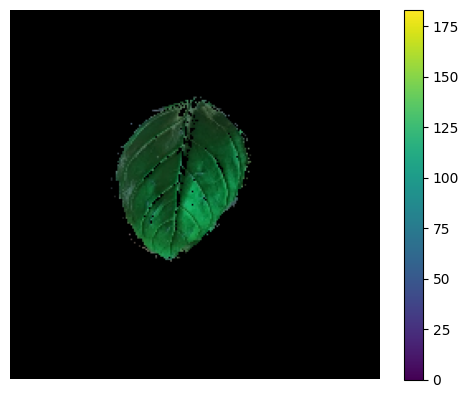

In [11]:
labels_2d = labels.reshape(polygon_2.shape[:2])

mask = (labels_2d == 1).astype(np.uint8)

masked_image = cv2.bitwise_and(polygon_2, polygon_2, mask=mask)

# plt.imshow(mask, cmap='jet')  # or use 'viridis', 'nipy_spectral', etc.
plt.imshow(masked_image)
# plt.title('2D Cluster Labels')
plt.axis('off')
plt.colorbar()  # optional, shows the cluster values
plt.show()


In [19]:
# leaf feature extraction

In [14]:
# compactness
# entropy
# color
# circularity
# energy
# eccentricity
# homogeneity
# unifomity
# correlation
# contrast
# max probability

from skimage.feature import graycomatrix, graycoprops
from skimage.measure import label, regionprops
from skimage.filters.rank import entropy
from skimage.morphology import disk

In [ ]:
# show_image
# image - its the image that you need to show
# message - title you want to give to the image while displaying
# output - the image shown in a window
def show_image(image, message):
    cv2.imshow(message, image)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [ ]:
# convert image to gray scale
image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)


# binary version of image
_, binary_image = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)


show_image(image, "gray image")

In [22]:
# Get region properties using skimage
label_img = label(binary_image)
props = regionprops(label_img)

if len(props) == 0:
    raise ValueError("No leaf detected in the image!")

In [24]:
region = props[0]
area = region.area
perimeter = region.perimeter



In [26]:
# Compactness: perimeter^2 / area
compactness = (perimeter ** 2) / area

# Circularity: 4π * area / perimeter^2
circularity = 4 * np.pi * area / (perimeter ** 2)

In [ ]:
# Entropy: texture complexity
# Normalize image to 8-bit range before entropy calculation
norm_img = (image / image.max() * 255).astype(np.uint8)
ent = entropy(norm_img, disk(5))
entropy_val = np.mean(ent)

# print(entropy_val)
# show_image(norm_img, "normalized image")

0.5562532701823492


In [29]:
# Energy: from gray-level co-occurrence matrix
glcm = graycomatrix(norm_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
energy = graycoprops(glcm, 'energy')[0, 0]

In [33]:
import pandas as pd

In [37]:
feature_vector = {
    "compactness": compactness,
    "entropy": entropy_val,
    "circularity": circularity,
    "energy": energy,
    "target": "healthy_pepper_mint"
}

df = pd.DataFrame([feature_vector])

In [38]:
df

,compactness,entropy,circularity,energy,target
0,96.380495,0.556253,0.130383,0.888157,healthy_pepper_mint
